In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the Data

In [15]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print(obs.head())
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

## Columns
The column names look well formed. 
### Key 
scientific_name

In [16]:
print(list(obs.columns))
print(list(species.columns))


['scientific_name', 'park_name', 'observations']
['category', 'scientific_name', 'common_names', 'conservation_status']


## Merge the two tables
Add species data to each observation

In [17]:
all_obs = pd.merge(obs, species, how='left', on='scientific_name')
print(all_obs.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


## Summary Info

In [18]:
all_obs.shape

(25632, 6)

In [19]:
all_obs.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [20]:
all_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


It looks like there are null values for conservation status. Lets see what the possibilities are there.

In [21]:
print(all_obs.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


It appears nan in this case means this species has a healthy population.  We can look at the relationship between conservation_status and observations. We'll build box plots for each category.  First we will fillna with 'None'.

In [22]:
all_obs.conservation_status.fillna('Unknown', inplace=True)
all_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  25632 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


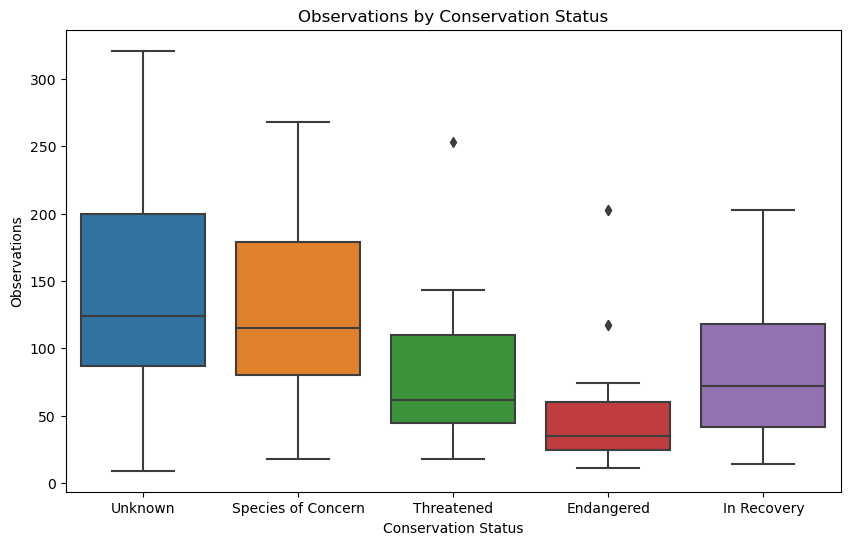

In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='conservation_status', y='observations', data=all_obs)
plt.xlabel('Conservation Status')
plt.ylabel('Observations')
plt.title('Observations by Conservation Status')
plt.show()

There is not a great difference between 'Unknown' and 'Species of Concern'.  This might imply that observations is not the only determining factor for what constitutes 'Species of Concern'